# 中国各省市县所有的地址

## 目标地址
> http://www.mca.gov.cn/article/sj/



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'http://www.mca.gov.cn/article/sj/xzqh/2019/2019/202002191838.html'

In [4]:
def getHtml(url):
    req = requests.get(url)
    return req.content.decode('utf-8')

In [5]:
html = getHtml(url)

In [6]:
soup = BeautifulSoup(html)

In [7]:
all_area = soup.findAll(attrs={"height":19})

In [10]:
print(all_area)

[<tr height="19" style="mso-height-source:userset;height:14.25pt">
<td class="xl6714735" height="19" style="height:14.25pt"></td>
<td class="xl7214735">110000</td>
<td class="xl7214735">北京市</td>
<td class="xl6714735"></td>
<td class="xl7114735"></td>
<td class="xl7114735"></td>
<td class="xl7114735"></td>
<td class="xl6514735"></td>
<td class="xl6514735"></td>
</tr>, <td class="xl6714735" height="19" style="height:14.25pt"></td>, <tr height="19" style="mso-height-source:userset;height:14.25pt">
<td class="xl6714735" height="19" style="height:14.25pt"></td>
<td class="xl7314735">110101</td>
<td class="xl7314735"><span style="mso-spacerun:yes">   </span>东城区</td>
<td class="xl6714735"></td>
<td class="xl7114735"></td>
<td class="xl7114735"></td>
<td class="xl7114735"></td>
<td class="xl6514735"></td>
<td class="xl6514735"></td>
</tr>, <td class="xl6714735" height="19" style="height:14.25pt"></td>, <tr height="19" style="mso-height-source:userset;height:14.25pt">
<td class="xl6714735" heig

In [8]:
def getInfo(tr):
    code = tr.contents[3].text
    city = tr.contents[5].text   
    return code,city

In [9]:
df = pd.DataFrame(columns=['code','city'])

In [10]:
for i in range(len(all_area)):
    try :
        df.loc[i] = getInfo(all_area[i])
    except:
        pass

In [73]:
df

,code,city
0,110000,北京市
2,110101,东城区
4,110102,西城区
6,110105,朝阳区
8,110106,丰台区
10,110107,石景山区
12,110108,海淀区
14,110109,门头沟区
16,110111,房山区
18,110112,通州区


In [75]:
df.to_csv('中国各省市县地址.csv',index=False)

In [ ]:
# 完整代码
import requests
from bs4 import BeautifulSoup
import pandas as pd

def getHtml(url):
    req = requests.get(url)
    return req.content.decode('utf-8')

def getInfo(tr):
    code = tr.contents[3].text
    city = tr.contents[5].text   
    return code,city

def main():
    url = 'http://www.mca.gov.cn/article/sj/xzqh/2019/2019/202002191838.html'
    soup = BeautifulSoup(getHtml(url))
    all_area = soup.findAll(attrs={"height":19})
    df = pd.DataFrame(columns=['code','city'])
    for i in range(len(all_area)):
        try :
            df.loc[i] = getInfo(all_area[i])
        except:
            pass
    print("完成任务")
    df.to_csv('中国各省市县地址.csv')

In [34]:
data = pd.DataFrame({
    'gender':['f','m','m','f','f'],
    "tv":[2,3,1,2,4]
})
grouped = data.groupby('gender')
print(grouped.describe())

          tv                                             
       count      mean       std  min  25%  50%  75%  max
gender                                                   
f        3.0  2.666667  1.154701  2.0  2.0  2.0  3.0  4.0
m        2.0  2.000000  1.414214  1.0  1.5  2.0  2.5  3.0


In [35]:
df_female = grouped.get_group('f')

In [38]:
type(df_female.values)

numpy.ndarray

f         AxesSubplot(0.1,0.15;0.363636x0.75)
m    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

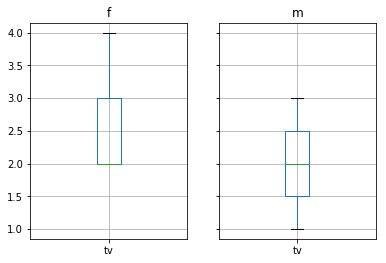

In [42]:
from matplotlib import pyplot as plt
plt.show()
grouped.boxplot()